<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

## Homework 2 :
<p />01211271 IAI & IoT
<p />Academic year 2023. First semester.


In [ ]:
# For colab user, install additional libraries
!pip install control

In [ ]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

***
### List of Homework problems (total 10 points)

* [P1. (10 points)](#p1)


<a id="p1"></a>
#### P1. (10 points)

On an MCU without true DAC module, an alternative way is to send output via PWM (Pulse-width modulation),
with duty cycle proportional to the level of desired analog signal. The analog signal is compared to a sawtooth signal
(implemented as a counter with max value equals 2^PWM-bit)
and the output level (0 or 1) is chosen depending on whether which one is higher in magnitude.

Let's consider a toy problem with 8-bit PWM with frequency 100 Hz. So the counter must count from 0 to 255 within
10 millisecs. The time step is then about 0.04 millisecs.

In [ ]:
ts = 10/256
ts

0.0390625

We can simulate PWM construction for some duration, say, 10 secs, using Python code as follows. Let's first create
some desired analog signal of frequency 0.5 Hz and swings from 0 - 250.

In [ ]:
f = 0.5
tvec = np.arange(0,10,0.00004)
sig_mag = 250/2
xvec = sig_mag*np.sin(2*np.pi*f*tvec) + sig_mag

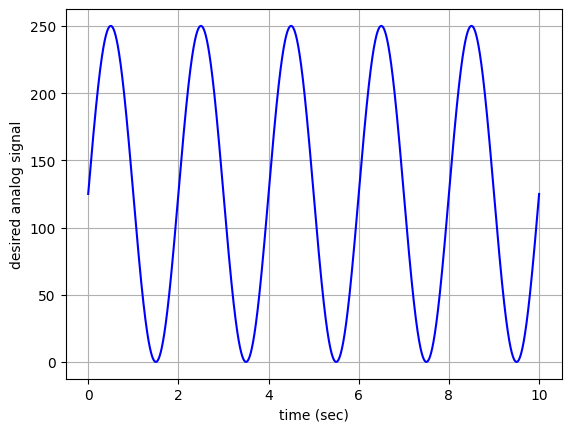

In [ ]:
plt.figure()
plt.plot(tvec,xvec,'b-')
plt.xlabel('time (sec)')
plt.ylabel('desired analog signal')
plt.grid('True')
plt.show()

Create sawtooth wave to compare with the analog signal

In [ ]:
def create_sawtooth(max_val, length):
    st_vec = np.zeros((length,1))
    current_val = 0
    for i in range(length):
        st_vec[i,0] = current_val
        current_val += 1
        if current_val > 255:
            current_val = 0

    return st_vec


In [ ]:
st_vec = create_sawtooth(255, tvec.shape[0])

Plot some range of this sawtooth signal. Its frequency should be approximately 100 Hz.  

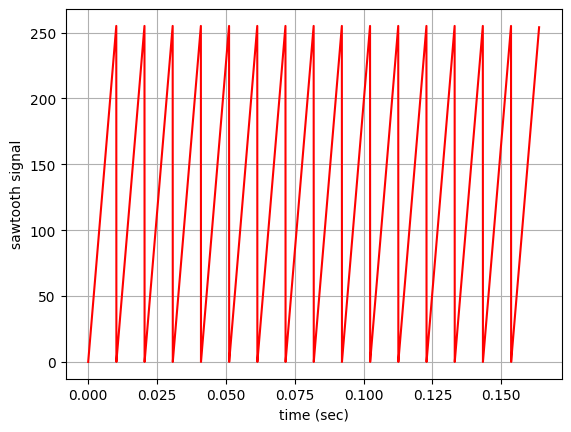

In [ ]:
plt.figure()
plt.plot(tvec[0:4095],st_vec[0:4095],'r-')
plt.xlabel('time (sec)')
plt.ylabel('sawtooth signal')
plt.grid('True')
plt.show()

Now the PWM output can be generated by comparing the analog signal $x$ with this sawtooth signal $st$. PWM = 1 if
$x \ge st$ and 0 if $x \lt st$

In [ ]:
def gen_PWM(analog,sawtooth):
    length = analog.shape[0]
    pwm_vec = np.zeros(length)
    for i in range(length):
        if analog[i]>= sawtooth[i]:
            pwm_vec[i] = 1
        else:
            pwm_vec[i] = 0
    return pwm_vec

In [ ]:
pwm_vec = gen_PWM(xvec,st_vec)

Observe some range of this PWM signal.

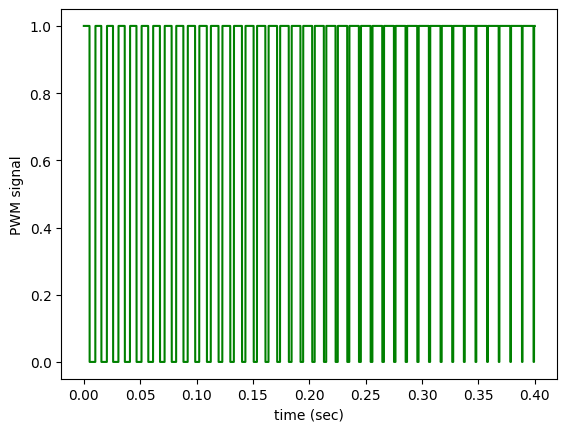

In [ ]:
plt.figure()
plt.plot(tvec[0:10000],pwm_vec[0:10000],'g-')
plt.xlabel('time (sec)')
plt.ylabel('PWM signal')
plt.show()

Now, suppose that you process some audio signal and want to drive some headphone unit that expects true analog signal.
You can, hopefully, use an RC circuit as shown in Figure 1 to convert PWM signal <code>pwm_vec</code>to the original
analog signal <code>xvec</code> as close as possible. Can you do that?

If your answer is yes, select some proper values for R and C such that your goal is achieved. Input <code>pwm_vec</code>
to the RC network and plot the resulting output compared with original <code>xvec</code>. You can scale the magnitude
of your output in the comparison. At least the sin-wave frequency should match well with <code>xvec</code>.

<p />
<p align="center">
<img src="https://drive.google.com/uc?id=1mW_6IREpdA-AWzwoKimafdWf-RYNm9Iq" alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 a passive LPF using RC circuit</b></div>


# Please noted that the application of this problem is about Class-D amplifier which is irrelevant to current curriculum, so we have no idea about it.

### Solution

# Parameters

In [ ]:
import math
f_cutoff = 5
C_filt = 100E-9
R_filt = 1/(2 * math.pi * f_cutoff * C_filt)
RC_const = R_filt * C_filt
num_sample = 250000

# I can't do Laplace transform, so I did this method instead.

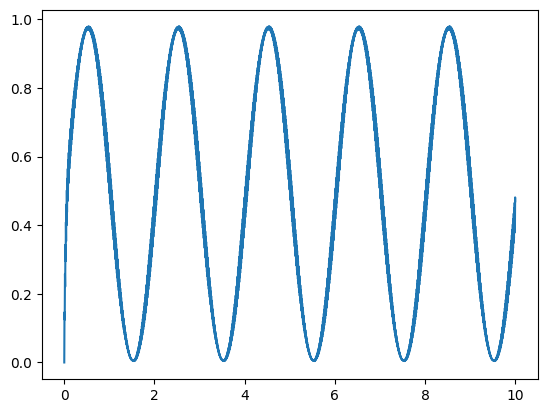

In [ ]:
voo = [0] * len(tvec)
# print(voo)
T_period = tvec[1] - tvec[0]
Vo = 0
for i in range(1,len(pwm_vec)):
    alpha = T_period / (T_period + RC_const)
    Vo = (pwm_vec[i] * alpha) + ((1-alpha) * voo[i - 1])
    voo[i] = Vo

plt.plot(tvec[0:num_sample],voo[0:num_sample])
plt.show()

##### Rev. 1A : August 2022